In [58]:
# Importing the libraries1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Cleaning

In [59]:
X=pd.read_csv("train_HK6lq50.csv")
y=pd.read_csv("test_wF0Ps6O.csv")

In [60]:
X.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [61]:
y.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


In [62]:
X['age'].fillna(value=np.floor(X['age'].mean()),inplace=True)

In [63]:
y['age'].fillna(value=np.floor(X['age'].mean()),inplace=True)

In [64]:
from statistics import mode 
X['trainee_engagement_rating'].fillna(value=mode(X['trainee_engagement_rating']),inplace=True)

In [65]:
y['trainee_engagement_rating'].fillna(value=mode(y['trainee_engagement_rating']),inplace=True)

In [66]:
X.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,36.0,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [67]:
#X['difficulty_level'].value_counts()

In [68]:
#sns.regplot(x='total_programs_enrolled',y='total_programs_enrolled',data=X)

In [69]:
X[X['trainee_engagement_rating'].isnull()]

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass


In [70]:
X.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [71]:
#import seaborn as sns
#sns.pairplot(X)

# Data Preprocessing

In [72]:
X_train=X.iloc[:,[2,3,5,6,8,9,10,11,12,13,14]].values

In [73]:
X_train

array([['Y', 136, 'offline', ..., 5, 'N', 1.0],
       ['T', 131, 'offline', ..., 2, 'N', 3.0],
       ['Z', 120, 'online', ..., 1, 'N', 2.0],
       ...,
       ['Y', 120, 'online', ..., 3, 'N', 4.0],
       ['V', 131, 'offline', ..., 2, 'N', 2.0],
       ['Y', 121, 'online', ..., 2, 'N', 4.0]], dtype=object)

In [74]:
X_test=X.iloc[:,15].values
X_test

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [75]:
y_train=y.iloc[:,[2,3,5,6,8,9,10,11,12,13,14]].values

In [76]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train[:,0] = labelencoder.fit_transform(X_train[:, 0])


In [77]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train[:,2] = labelencoder.fit_transform(X_train[:, 2])


In [78]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train[:,3] = labelencoder.fit_transform(X_train[:, 3])

In [79]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train[:,4] = labelencoder.fit_transform(X_train[:, 4])

In [80]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train[:,5] = labelencoder.fit_transform(X_train[:, 5])

In [81]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X_train[:,9] = labelencoder.fit_transform(X_train[:, 9])

In [82]:
X_train[:,[0,2,3,4,5,9]]

array([[5, 0, 2, 1, 3, 0],
       [1, 0, 0, 0, 1, 0],
       [6, 1, 0, 1, 3, 0],
       ...,
       [5, 1, 0, 1, 3, 0],
       [3, 0, 2, 1, 1, 0],
       [5, 1, 0, 0, 1, 0]], dtype=object)

In [83]:
w=pd.DataFrame(X_train)
w.head()

,0,1,2,3,4,5,6,7,8,9,10
0,5,136,0,2,1,3,3,24,5,0,1
1,1,131,0,0,0,1,4,26,2,0,3
2,6,120,1,0,1,3,1,40,1,0,2
3,1,117,0,0,0,3,3,36,4,0,1
4,3,131,0,2,0,1,1,42,2,0,4


In [84]:
import sklearn.preprocessing
a = X_train[:,3].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)


In [85]:
X_train=np.concatenate((b,X_train),axis=1)
X_train = X_train[:, 1:]


In [86]:
#import sklearn.preprocessing
a = X_train[:,8].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
b

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [87]:
X_train=np.concatenate((b,X_train),axis=1)
X_train= X_train[:, 1:]
X_train

array([[0, 0, 1, ..., 5, 0, 1.0],
       [1, 0, 0, ..., 2, 0, 3.0],
       [0, 0, 1, ..., 1, 0, 2.0],
       ...,
       [0, 0, 1, ..., 3, 0, 4.0],
       [1, 0, 0, ..., 2, 0, 2.0],
       [1, 0, 0, ..., 2, 0, 4.0]], dtype=object)

In [88]:
#import sklearn.preprocessing
a = X_train[:,7].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
X_train=np.concatenate((b,X_train),axis=1)
X_train= X_train[:, 1:]
X_train

array([[0, 0, 0, ..., 5, 0, 1.0],
       [1, 0, 0, ..., 2, 0, 3.0],
       [0, 0, 0, ..., 1, 0, 2.0],
       ...,
       [0, 0, 0, ..., 3, 0, 4.0],
       [0, 0, 1, ..., 2, 0, 2.0],
       [0, 0, 0, ..., 2, 0, 4.0]], dtype=object)

In [89]:
X_train=X_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,19,20,21,22,23]]

In [90]:
v=pd.DataFrame(X_train)
v=v.astype(float)
#v[v[14].isnull()]
v.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,136.0,0.0,1.0,3.0,24.0,5.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,131.0,0.0,0.0,4.0,26.0,2.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,120.0,1.0,1.0,1.0,40.0,1.0,0.0,2.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,117.0,0.0,0.0,3.0,36.0,4.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,131.0,0.0,0.0,1.0,42.0,2.0,0.0,4.0


In [91]:
x=v.values
#v.dtypes
X_train=x


In [92]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y_train[:,0] = labelencoder.fit_transform(y_train[:, 0])


In [93]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y_train[:,2] = labelencoder.fit_transform(y_train[:, 2])
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y_train[:,3] = labelencoder.fit_transform(y_train[:, 3])
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y_train[:,4] = labelencoder.fit_transform(y_train[:, 4])
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y_train[:,5] = labelencoder.fit_transform(y_train[:, 5])
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y_train[:,9] = labelencoder.fit_transform(y_train[:, 9])

In [94]:
#import sklearn.preprocessing
a = y_train[:,3].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
y_train=np.concatenate((b,y_train),axis=1)
y_train = y_train[:, 1:]
#import sklearn.preprocessing
a = y_train[:,8].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
y_train=np.concatenate((b,y_train),axis=1)
y_train= y_train[:, 1:]
y_train

array([[0, 0, 1, ..., 2, 0, 4.0],
       [0, 0, 0, ..., 4, 0, 4.0],
       [0, 0, 1, ..., 2, 0, 3.0],
       ...,
       [0, 0, 0, ..., 3, 0, 4.0],
       [0, 0, 1, ..., 1, 0, 1.0],
       [0, 0, 1, ..., 4, 0, 3.0]], dtype=object)

In [95]:
#import sklearn.preprocessing
a = y_train[:,7].astype(int)
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
y_train=np.concatenate((b,y_train),axis=1)
y_train= y_train[:, 1:]
y_train

array([[1, 0, 0, ..., 2, 0, 4.0],
       [0, 0, 0, ..., 4, 0, 4.0],
       [0, 0, 0, ..., 2, 0, 3.0],
       ...,
       [0, 0, 0, ..., 3, 0, 4.0],
       [0, 0, 0, ..., 1, 0, 1.0],
       [0, 0, 0, ..., 4, 0, 3.0]], dtype=object)

In [96]:
y_train=y_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,19,20,21,22,23]]
v=pd.DataFrame(y_train)
v=v.astype(float)
y_train=v.values
v.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,131.0,0.0,0.0,3.0,46.0,2.0,0.0,4.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,135.0,1.0,1.0,3.0,36.0,4.0,0.0,4.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,120.0,1.0,1.0,3.0,36.0,2.0,0.0,3.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,122.0,0.0,0.0,1.0,36.0,2.0,0.0,2.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,122.0,0.0,0.0,3.0,36.0,2.0,0.0,2.0


In [97]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train[:,[7,10,11,12,14]] = sc.fit_transform(X_train[:,[7,10,11,12,14]])
#y_train[:,[7,10,11,12,14]] = sc.fit_transform(y_train[:,[7,10,11,12,14]])
#X_test = sc.transform(X_test)

In [98]:
#import statsmodels.regression.linear_model as sm

In [99]:
#X_opt=X_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,12,14]]
#y_opt=y_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,12,14]]

In [100]:
#regressor_OLS=sm.OLS(endog=X_test,exog=X_opt).fit()

In [101]:
#regressor_OLS.summary()

In [102]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
y_train = pca.transform(y_train)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.48665558, 0.45213346])

In [103]:
#!pip install xgboost

# Modeling Starts Form Here

In [104]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, X_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [105]:
#!pip install neupy

In [106]:
y_pred = classifier.predict(y_train)

In [107]:
y_pred1= classifier.predict(X_train)

In [108]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = X_test, cv = 5)
print(accuracies.mean())
print(accuracies.std())

0.6979506777495631
0.003212973783963688


In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(X_test, y_pred1)

In [110]:
from sklearn.metrics import f1_score
f1_score(X_test, y_pred1, average='weighted')

0.8668007175348129

In [111]:
y['is_pass']=y_pred
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [112]:
t=y[['id','is_pass']]

In [113]:
t.to_csv("submission3.csv",index=False) #0.65

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


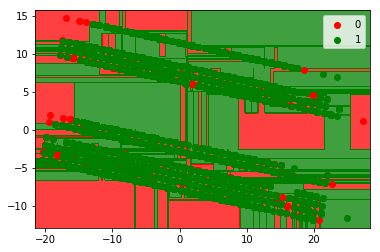

In [114]:
#For pca =2
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, X_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


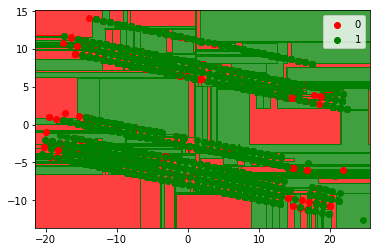

In [115]:
#for pca=2
from matplotlib.colors import ListedColormap
X_set, y_set = y_train, y_pred
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.legend()
plt.show()